### Importing Libraries

In [2]:
import os
import pandas as pd, numpy as np
import zipfile
from PIL import Image
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm

### Unzip the zip file

In [3]:
with zipfile.ZipFile(r"C:\Users\sivak\New folder\ML\Recognization\mnist.zip", "r") as zip:
    zip.extractall(r"C:\Users\sivak\New folder\ML\Recognization\New folder")

#### Reading the unziped files from local storage

In [4]:
def read_image_files(output_dir_path):
    """
    Reads all .jpg, .png, .jpeg files from the specified directory 
    and its subdirectories using os.walk and returns a list of dictionaries.
    Each dictionary contains the file name, file path, and its dimensions.
    """
    files_data = []
    for root, dirs, files in os.walk(output_dir_path):
        print(f"Reading Image Files from {root}... Detected {len(files)} files in {root} directory.")
        for file_name in files:
            if file_name.lower().endswith((".jpg", ".png", ".jpeg")):
                file_path = os.path.join(root, file_name)
                try:
                    with Image.open(file_path) as img:
                        file_info = {
                            "file_name": file_name,
                            "width": img.width,
                            "height": img.height
                        }
                        files_data.append(file_info)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    return files_data


output_dir_path = r"C:\Users\sivak\New folder\ML\Recognization\New folder"
files_data = read_image_files(output_dir_path)

Reading Image Files from C:\Users\sivak\New folder\ML\Recognization\New folder... Detected 0 files in C:\Users\sivak\New folder\ML\Recognization\New folder directory.
Reading Image Files from C:\Users\sivak\New folder\ML\Recognization\New folder\New folder... Detected 0 files in C:\Users\sivak\New folder\ML\Recognization\New folder\New folder directory.
Reading Image Files from C:\Users\sivak\New folder\ML\Recognization\New folder\New folder\A... Detected 13870 files in C:\Users\sivak\New folder\ML\Recognization\New folder\New folder\A directory.
Reading Image Files from C:\Users\sivak\New folder\ML\Recognization\New folder\New folder\B... Detected 8668 files in C:\Users\sivak\New folder\ML\Recognization\New folder\New folder\B directory.
Reading Image Files from C:\Users\sivak\New folder\ML\Recognization\New folder\New folder\C... Detected 23409 files in C:\Users\sivak\New folder\ML\Recognization\New folder\New folder\C directory.
Reading Image Files from C:\Users\sivak\New folder\ML\

### Load the Dataset

In [5]:
df = pd.DataFrame(files_data)
df

,file_name,width,height
0,A-0.png,28,28
1,A-1.png,28,28
2,A-10.png,28,28
3,A-100.png,28,28
4,A-1000.png,28,28
...,...,...,...
372446,Z-995.png,28,28
372447,Z-996.png,28,28
372448,Z-997.png,28,28
372449,Z-998.png,28,28


In [6]:
df.to_csv('imgfiles.csv')

In [7]:
df1 = pd.read_csv(r"C:\Users\sivak\New folder\Machine Learning\imgfiles.csv", index_col=0)
df1.head()

,file_name,width,height
0,A-0.png,28,28
1,A-1.png,28,28
2,A-10.png,28,28
3,A-100.png,28,28
4,A-1000.png,28,28


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372451 entries, 0 to 372450
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   file_name  372451 non-null  object
 1   width      372451 non-null  int64 
 2   height     372451 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 11.4+ MB


In [9]:
df1.describe()

,width,height
count,372451.0,372451.0
mean,28.0,28.0
std,0.0,0.0
min,28.0,28.0
25%,28.0,28.0
50%,28.0,28.0
75%,28.0,28.0
max,28.0,28.0


In [10]:
def read_image_files(path):
    images_data = []
    first_dir_skipped = False
    label_count = {}

    for root, dirs, files in os.walk(path):
        if not first_dir_skipped:
            first_dir_skipped = True
            continue

        dir_name = os.path.basename(root)
        dir_last_char = dir_name[-1]

        if dir_last_char not in label_count:
            label_count[dir_last_char] = 0

        files = [f for f in files if os.path.splitext(f)[-1].lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']]
        for file_name in tqdm(files, desc=f'Processing {dir_name}', leave=False):
            file_path = os.path.join(root, file_name)
            img = Image.open(file_path).convert('L')  # Convert image to grayscale
            img = img.resize((8, 8))  # Resize image to 8x8 pixels
            img_array = list(img.getdata())  # Get pixel data

            # Create a dictionary with pixel data and label
            img_data = {f'pixel{i}': img_array[i] for i in range(64)}
            img_data['label'] = dir_last_char

            images_data.append(img_data)
            label_count[dir_last_char] += 1
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

In [11]:
path = r"C:\Users\sivak\New folder\ML\Recognization\New folder\New folder"
images_data = read_image_files(path)

image_df = load_into_df(images_data)
image_df.to_csv('image_alphabets.csv', index = False)
image_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [12]:
df = pd.read_csv(r"C:\Users\sivak\New folder\Machine Learning\image_alphabets.csv") 
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [13]:
image_df.shape 

(372451, 65)

In [14]:
image_df['label'].nunique() 

26

In [15]:
image_df['label'].value_counts(normalize = True)

label
O    0.155255
S    0.130001
U    0.077884
C    0.062851
T    0.060397
P    0.051929
N    0.051040
A    0.037240
M    0.033121
L    0.031107
R    0.031054
E    0.030715
Y    0.029156
W    0.028954
D    0.027209
B    0.023273
J    0.022803
H    0.019380
X    0.016840
Z    0.016314
Q    0.015605
G    0.015470
K    0.015044
V    0.011228
F    0.003123
I    0.003007
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

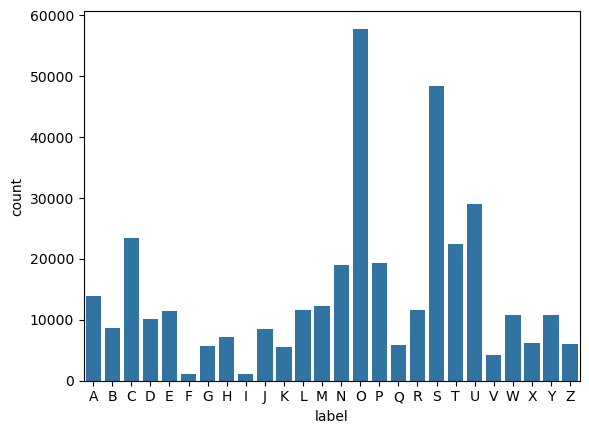

In [16]:
sns.countplot(data=image_df, x='label')

The tallest bar corresponds to the letters 'O' and ‘S’, indicating it occurs most frequently. This information could be valuable for statistical analysis or language pattern recognition.

Randomly Generated index: 1070
Label of image at 1070 index: A

Data Type of Image Array: object
Image Array:
 [[0 0 0 0 0 1 1 0]
 [0 0 0 0 6 89 44 0]
 [0 0 0 31 79 58 49 0]
 [0 0 3 165 103 95 29 0]
 [0 0 56 88 20 78 1 0]
 [0 21 116 0 71 25 0 0]
 [0 50 51 2 25 0 0 0]
 [0 0 0 0 0 0 0 0]]


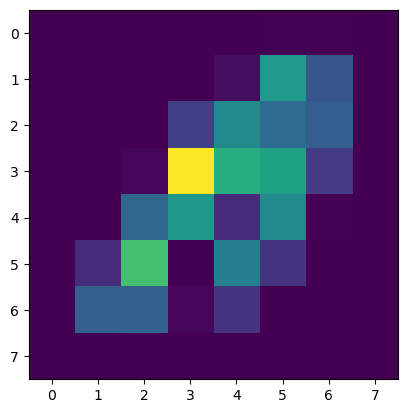

In [17]:
idx = np.random.randint(0, 1796)
print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")
plt.imshow(img)

[189097  22040 292815 212196 276779 139771 367758  80767  90858]


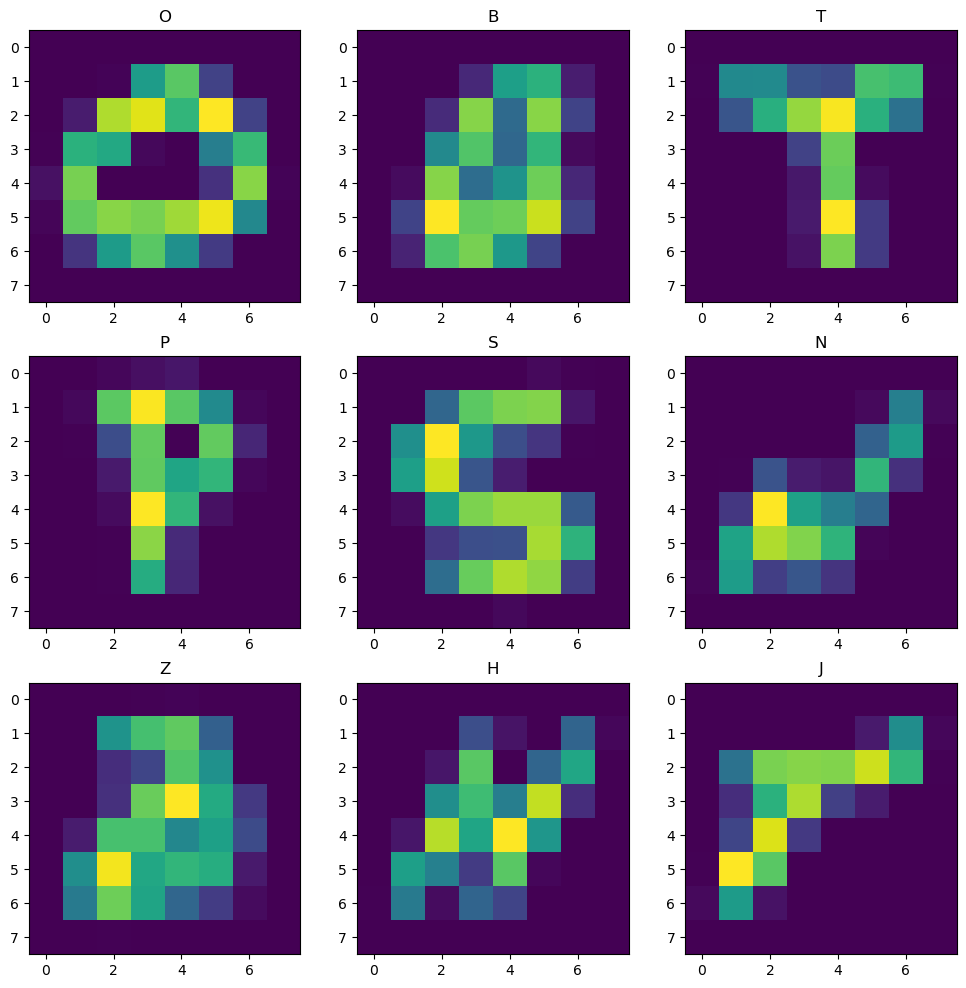

In [18]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, image_df.shape[0], 9)
print(idx)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    label = image_df.iloc[idx[i], -1]
    plt.title(label)
    img_grid = np.reshape(image_df.iloc[idx[i], 0:-1], (8,8))
    img_grid = img_grid.astype("float")
    plt.imshow(img_grid)

In [19]:
from sklearn.model_selection import train_test_split

strata_column = 'label'

df_sample, _ = train_test_split(image_df, test_size=(len(image_df) - 50000) / len(image_df), stratify=image_df[strata_column], random_state=42)
print("Sampled Dataset Size:", len(df_sample))

Sampled Dataset Size: 50000


In [20]:
X = df_sample.drop(columns = ['label'])
y = df_sample['label']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 64) (40000,)
(10000, 64) (10000,)


In [22]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_train.index)

X_train_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
180518,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.047059,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
126214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
351917,0.0,0.0,0.0,0.0,0.0,0.0,0.011905,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.011236,0.000000,0.0,0.000000,0.000000,0.0,0.0
312220,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.064286,0.0,0.000000,0.000000,0.0,0.0
366004,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.070588,...,0.0,0.0,0.0,0.000000,0.021429,0.0,0.046296,0.014184,0.0,0.0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                   columns=X_train.columns, 
                                   index=X_train.index)

X_train_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
180518,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,-0.305796,-0.221392,-0.030974,-0.16185,-0.065301,...,-0.426328,-0.054067,-0.014578,-0.153914,-0.246832,-0.388022,-0.285197,-0.147139,-0.117932,-0.008342
126214,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,-0.305796,-0.221392,-0.030974,-0.16185,-0.386576,...,-0.426328,-0.054067,-0.014578,-0.153914,-0.246832,-0.388022,-0.285197,-0.147139,-0.117932,-0.008342
351917,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,-0.305796,0.678393,-0.030974,-0.16185,-0.386576,...,-0.426328,-0.054067,-0.014578,0.933624,-0.246832,-0.388022,-0.285197,-0.147139,-0.117932,-0.008342
312220,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,-0.305796,-0.221392,-0.030974,-0.16185,-0.386576,...,-0.426328,-0.054067,-0.014578,-0.153914,4.971918,-0.388022,-0.285197,-0.147139,-0.117932,-0.008342
366004,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,-0.305796,-0.221392,-0.030974,-0.16185,0.095336,...,-0.426328,-0.054067,-0.014578,-0.153914,1.492751,-0.388022,2.292509,1.296289,-0.117932,-0.008342


In [24]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_test.index)

X_test_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
329406,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,0.856042,0.678393,-0.030974,-0.16185,-0.386576,...,-0.426328,-0.054067,-0.014578,-0.153914,0.333029,-0.388022,-0.285197,-0.147139,-0.117932,-0.008342
125157,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,-0.305796,-0.221392,-0.030974,-0.16185,-0.386576,...,-0.112010,-0.054067,-0.014578,-0.153914,-0.246832,-0.388022,-0.285197,-0.147139,-0.117932,-0.008342
342562,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,-0.305796,-0.221392,-0.030974,-0.16185,-0.105461,...,-0.426328,-0.054067,-0.014578,-0.153914,-0.246832,-0.388022,-0.285197,-0.147139,-0.117932,-0.008342
279503,-0.023986,-0.111139,-0.154536,-0.236967,1.654579,-0.305796,-0.221392,-0.030974,-0.16185,-0.386576,...,0.830943,-0.054067,-0.014578,-0.153914,2.072612,0.030398,-0.285197,-0.147139,-0.117932,-0.008342
300674,-0.023986,-0.111139,-0.154536,-0.236967,-0.334546,-0.305796,-0.221392,-0.030974,-0.16185,0.095336,...,-0.426328,-0.054067,-0.014578,-0.153914,-0.246832,-0.388022,-0.285197,-0.147139,-0.117932,-0.008342


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import time

scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

classifier = MultinomialNB()

start_time = time.time()
classifier.fit(X_train_transformed, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_test_pred = classifier.predict(X_test_transformed)
prediction_time = time.time() - start_time

accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.2f} seconds")
print(f"Model's Accuracy: {accuracy:.4f}")


Training Time: 0.10 seconds
Prediction Time: 0.00 seconds
Model's Accuracy: 0.6517


In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
%time classifier.fit(X_train_transformed, y_train)

start_time = time.time()

y_test_pred = classifier.predict(X_test_transformed)
LR_prediction_time = time.time() - start_time

print()
print(f"Model's Accuracy :{metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Logistic Regression Model prediction Time: {LR_prediction_time:.2f} seconds")

CPU times: total: 1.12 s
Wall time: 2.99 s

Model's Accuracy :0.852
Logistic Regression Model prediction Time: 0.00 seconds


c:\Users\sivak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

start_time = time.time()

y_test_pred = classifier.predict(X_test_transformed)
DT_prediction_time = time.time() - start_time

print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Decision Tree Model Prediction Time: {DT_prediction_time:.2f} seconds")

CPU times: total: 438 ms
Wall time: 1.55 s

Model's Accuracy : 0.8153
Decision Tree Model Prediction Time: 0.01 seconds


In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
%time classifier.fit(X_train_transformed, y_train)

start_time = time.time()

y_test_pred = classifier.predict(X_test_transformed)
KNN_prediction_time = time.time() - start_time

print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"K Nearest Neighbor Model Prediction Time: {KNN_prediction_time:.2f} seconds")

CPU times: total: 0 ns
Wall time: 35.3 ms

Model's Accuracy : 0.9368
K Nearest Neighbor Model Prediction Time: 1.22 seconds


In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
%time classifier.fit(X_train_transformed, y_train)

start_time = time.time()

y_test_pred = classifier.predict(X_test_transformed)
RF_prediction_time = time.time() - start_time

print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random Forest Model Prediction Time: {RF_prediction_time:.2f} seconds")

CPU times: total: 3.95 s
Wall time: 14.4 s

Model's Accuracy : 0.9325
Random Forest Model Prediction Time: 0.30 seconds


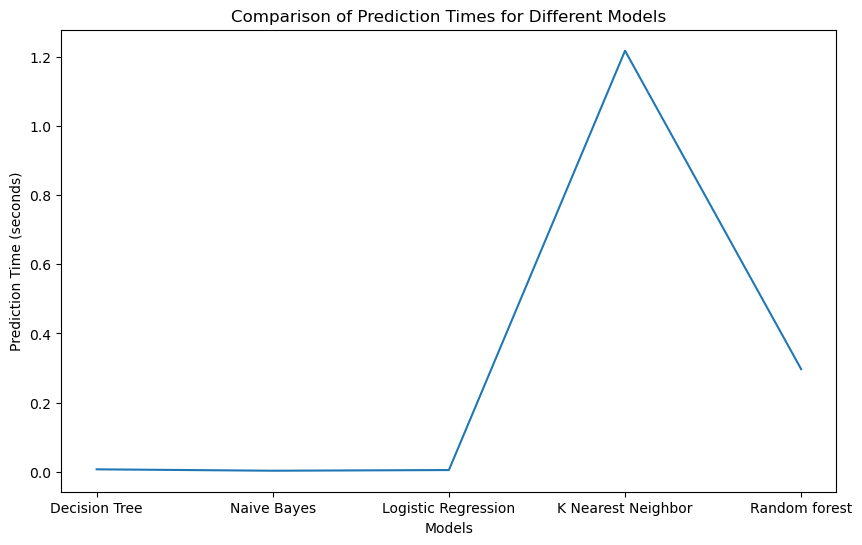

In [31]:
model_names = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'K Nearest Neighbor', 'Random forest']
prediction_times = [DT_prediction_time, prediction_time, LR_prediction_time, KNN_prediction_time, RF_prediction_time]

plt.figure(figsize=(10, 6))
plt.plot(model_names, prediction_times)
plt.xlabel('Models')
plt.ylabel('Prediction Time (seconds)')
plt.title('Comparison of Prediction Times for Different Models')
plt.show() 

- **Decision Tree:** Has a relatively low prediction time.
- **Naive Bayes:** Also shows a quick prediction time.
- **Logistic Regression:** Similar to Naive Bayes in terms of efficiency.
- **K Nearest Neighbor:** Moderately fast prediction time.
- **Random Forest:** Significantly slower, with a prediction time of approximately 1.3 seconds.